In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
X = torch.arange(1,21,1).type(torch.float).unsqueeze(1)
X.shape, X.dtype, X.device

(torch.Size([20, 1]), torch.float32, device(type='cpu'))

In [ ]:
#y = 1.5x+1.5
y = torch.add(torch.mul(X,1.5),1.5)
y.shape, X.ndim, y.ndim

(torch.Size([20, 1]), 2, 2)

In [ ]:
X_train, X_test = torch.split(X,15)
y_train, y_test = torch.split(y, 15)

In [ ]:
def plot_data(train_data=X_train,
              train_target=y_train,
              test_data=X_test,
              test_target=y_test,
              prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_target, c='b', s=4, label='Training Data')
  plt.scatter(test_data, test_target, c='g', s=4, label='Test Data')
  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label='Predicted Data')
  plt.legend(prop={"size":14})

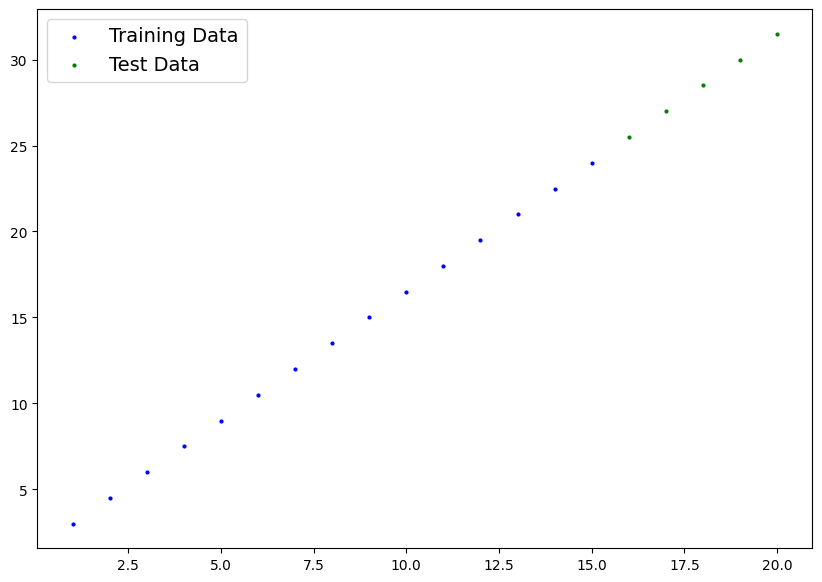

In [ ]:
plot_data()

##**Linear Regression Model**

In [ ]:
class SimpleLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Linear(
        in_features=1,
        out_features=1,
        bias=True
    )

  def forward(self, x):
    return self.layer(x)


In [ ]:
torch.manual_seed(42)
model = SimpleLinearRegression()
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.7645]])),
             ('layer.bias', tensor([0.8300]))])

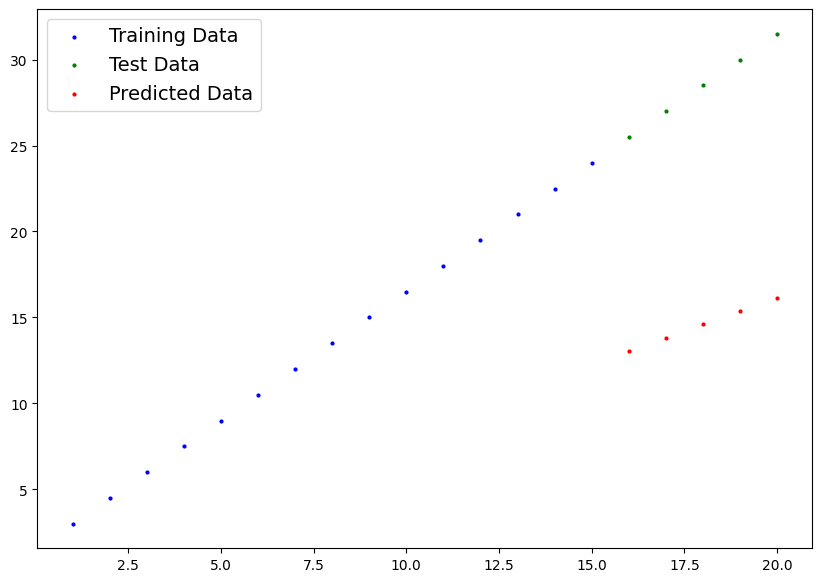

In [ ]:
model.eval()
with torch.inference_mode():
  y_before_pred = model(X_test)

plot_data(prediction=y_before_pred)

In [ ]:
##Loss & Optimizer
#loss
loss_fn = nn.MSELoss()

#optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.001)

In [ ]:
#Training Loop

epochs=19

for epoch in range(1,epochs+1):

  #1.forward pass
  model.train()
  y_hat = model(X_train)

  #2. loss calcuate
  train_loss = loss_fn(y_hat, y_train)

  #3. zerograd
  optimizer.zero_grad()
  #4. loss backward()
  train_loss.backward()
  #5. optimizer step
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

    print(f"Epoch:{epoch} | Train_Loss:{train_loss} | Test_Loss:{test_loss}")

Epoch:1 | Train_Loss:53.04763412475586 | Test_Loss:133.2882537841797
Epoch:2 | Train_Loss:36.84349060058594 | Test_Loss:91.08572387695312
Epoch:3 | Train_Loss:25.596500396728516 | Test_Loss:62.04277420043945
Epoch:4 | Train_Loss:17.790172576904297 | Test_Loss:42.091957092285156
Epoch:5 | Train_Loss:12.371943473815918 | Test_Loss:28.417129516601562
Epoch:6 | Train_Loss:8.611248970031738 | Test_Loss:19.06943702697754
Epoch:7 | Train_Loss:6.001004219055176 | Test_Loss:12.701066017150879
Epoch:8 | Train_Loss:4.189267158508301 | Test_Loss:8.38056468963623
Epoch:9 | Train_Loss:2.931755542755127 | Test_Loss:5.4647722244262695
Epoch:10 | Train_Loss:2.05892014503479 | Test_Loss:3.510075807571411
Epoch:11 | Train_Loss:1.4530850648880005 | Test_Loss:2.2108776569366455
Epoch:12 | Train_Loss:1.0325641632080078 | Test_Loss:1.3570268154144287
Epoch:13 | Train_Loss:0.740668535232544 | Test_Loss:0.8042607307434082
Epoch:14 | Train_Loss:0.5380478501319885 | Test_Loss:0.4537907540798187
Epoch:15 | Train_

In [ ]:
model.state_dict()

OrderedDict([('layer.weight', tensor([[1.5324]])),
             ('layer.bias', tensor([0.9096]))])

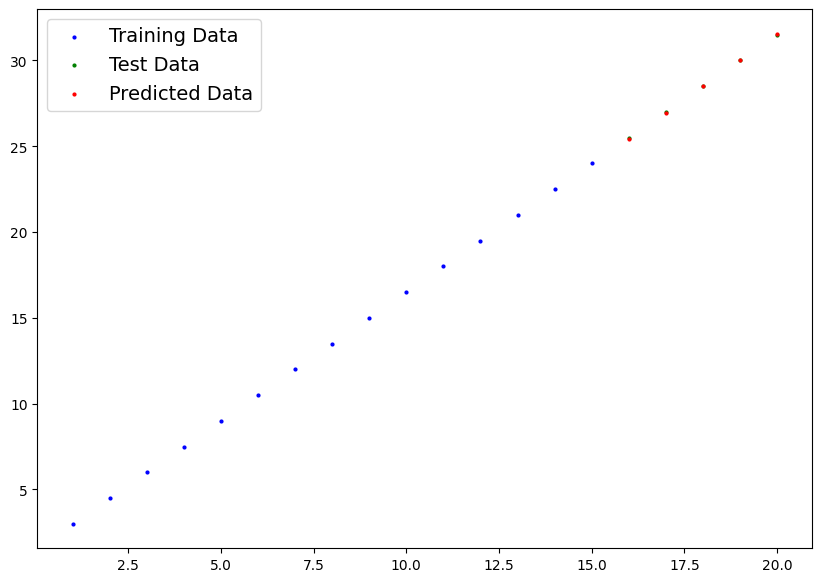

In [ ]:
model.eval()
with torch.inference_mode():
  y_after_pred = model(X_test)

plot_data(prediction=y_after_pred)

In [ ]:
#Save
from pathlib import Path

directory = Path('model')
directory.mkdir(parents=True, exist_ok=True)

In [ ]:
file_name = "SimpleLinearModel.pt"
file_path = directory/file_name

print("Model is Saving.....")
torch.save(obj=model.state_dict(), f=file_path)
print("Model is Saved Successfuly")

Model is Saving.....
Model is Saved Successfuly


In [ ]:
loaded_model = SimpleLinearRegression()
loaded_model.load_state_dict(torch.load(file_path))
loaded_model.state_dict()

OrderedDict([('layer.weight', tensor([[1.5324]])),
             ('layer.bias', tensor([0.9096]))])

In [ ]:
with torch.inference_mode():
  y_new_pred = loaded_model(torch.tensor([200.0]).unsqueeze(1))
y_new_pred

tensor([[307.3819]])

In [ ]:
new_file_path = directory/"new.pth"
torch.save(obj=model, f=new_file_path)

In [ ]:
new_loaded_model = torch.load(new_file_path)

In [ ]:
with torch.inference_mode():
  y_new_pred = new_loaded_model(torch.tensor([200.0]).unsqueeze(1))
y_new_pred

tensor([[307.3819]])